In [1]:
#%matplotlib widget
%gui qt
import os
import matplotlib.pyplot as plt
import numpy as np
plt.ion()

In [2]:
path = '/home/xiao/data/WeijiangXue_2020'

fn = []

### 54307
fn.append(os.path.join(path, '54307_kde_in_oi_mask_#50_particle_1.txt'))
fn.append(os.path.join(path, '54307_kde_in_oi_mask_#50_particle_1&2&3.txt'))

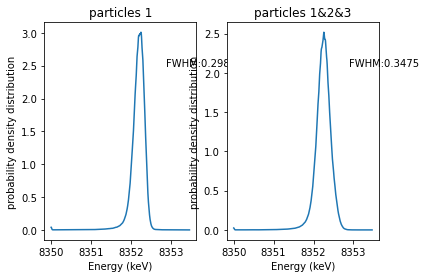

In [3]:
sid = 54307

if sid in [54307, 54308, 54311]:
    cnt = 0
    fig, ax = plt.subplots(1, 2)
    for f in fn:
        d = np.loadtxt(f)
        #plt.figure(cnt)
        ax[cnt].plot(d[:, 0], d[:, 1])
        p_id = d[:, 1].argmax()
        p = d[:, 1][p_id]
        hw = d[p_id:, 0][np.abs(d[p_id:, 1] - p/2).argmin()] - d[:p_id, 0][np.abs(d[:p_id, 1] - p/2).argmin()]
        ax[cnt].set_title('particles '+f.split('.')[0].split('_')[-1])
        ax[cnt].set_xlabel('Energy (keV)')
        ax[cnt].set_ylabel('probability density distribution')
        ax[cnt].text((ax[cnt].get_xlim()[1]-ax[cnt].get_xlim()[0])*0.8+ax[cnt].get_xlim()[0], 
                     (ax[cnt].get_ylim()[1]-ax[cnt].get_ylim()[0])*0.8+ax[cnt].get_ylim()[0], 'FWHM:{}'.format(int(hw*1e4)/1e4))
        
        cnt += 1

In [5]:
import tifffile, numpy as np

In [7]:
fn = '/home/xiao/data/Peijian_Sept2020/recon_fly_scan2_id_69495/segmented_image1.tif'
img = tifffile.imread(fn)

crack = (img == 0).astype(np.int8)
hp = (img == 1).astype(np.int8)
lp = (img == 2).astype(np.int8)
air = (img == 3).astype(np.int8)

ofn = '/home/xiao/data/Peijian_Sept2020/recon_fly_scan2_id_69495/segmented_image1_cracks.tif'
tifffile.imsave(ofn, crack)
ofn = '/home/xiao/data/Peijian_Sept2020/recon_fly_scan2_id_69495/segmented_image1_high_phase.tif'
tifffile.imsave(ofn, hp)
ofn = '/home/xiao/data/Peijian_Sept2020/recon_fly_scan2_id_69495/segmented_image1_low_phase.tif'
tifffile.imsave(ofn, lp)
ofn = '/home/xiao/data/Peijian_Sept2020/recon_fly_scan2_id_69495/segmented_image1_air.tif'
tifffile.imsave(ofn, air)